# Embedding

In [31]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [14]:
texto = 'Olá mundo'
texto_tokenized = texto.split()

In [16]:
texto_tokenized = [i for i, v in enumerate(texto_tokenized)]

In [17]:
texto_tokenized

[0, 1]

Esses números não significam quase nada, foi só uma maneira de separar as palavras agora usaremos `Word Embedding` para criar representações vetoriais dos nossos textos.  
Para mais informações [clique aqui](https://www.youtube.com/watch?v=viZrOnJclY0&t=24s) e veja a aula do Statquest.

In [19]:
vocab_size = 2
embedding_dim = 2

In [23]:
embedding_layer = nn.Embedding(vocab_size, embedding_dim)
embedding_layer

Embedding(2, 2)

In [26]:
texto_tokenized = torch.tensor(texto_tokenized)
embedded_sequence = embedding_layer(texto_tokenized)

In [30]:
print(f'representação do Olá: {embedded_sequence[0]}')
print(f'representação do mundo: {embedded_sequence[1]}')

representação do Olá: tensor([-0.3090, -1.5534], grad_fn=<SelectBackward0>)
representação do mundo: tensor([-0.5481, -0.3111], grad_fn=<SelectBackward0>)


In [36]:
embedded_sequence[:, 0].detach().numpy()

array([-0.30902165, -0.5481234 ], dtype=float32)

In [57]:
X = embedded_sequence.detach().numpy()
Y = embedded_sequence[:, 1].detach().numpy()

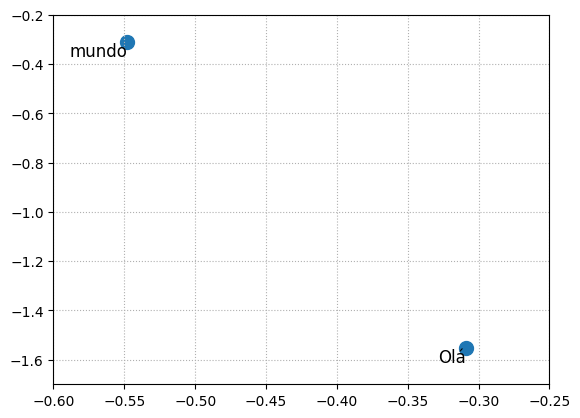

In [77]:
plt.scatter(x=X[:, 0], y=X[:, 1], s=100)
plt.grid(True, linestyle=':')
plt.xlim(-0.60, -.25)
plt.ylim(-1.7, -.2)
for i, texto in enumerate(['Olá', 'mundo']):
    plt.annotate(texto, (X[i, 0], X[i, 1]), fontsize=12, color='k', ha='right', va='top')
plt.show()

### Explicação resumida:
O Word Embedding pega sua palavra "token" e coloca ele em um espaço vetorial de dimensão `embedding_dim` através do treinamento ele vai colocando palavras que aparecem no mesmo contexto mais próximas umas das outras. Dessa forma se tivessemos um embedding bem treinado palavras como "olá" e "oi" teriam seus embeddings proximos. Ao inicializar os embeddings são aleatorios e com o passar do tempo e backpropagation ele vai convergindo.